<a href="https://colab.research.google.com/github/am28012/Hands_on_project/blob/main/Mental_Health_of_RemoteWorkers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

In [7]:
df = pd.read_csv('/content/M_H.csv')
df.describe()

,Employee_ID,Age,Experience_Years,Hours_Worked_Per_Week,Productivity_Score,Burnout_Score,Sleep_Hours_Per_Day,Work_Life_Balance_Rating,Remote_Setup_Satisfaction,Team_Communication_Effectiveness
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.250000,9.444000,42.113000,6.063000,49.550000,6.390000,6.167000,6.150000,6.138000
std,29.011492,8.266245,5.532682,4.535308,1.916154,22.265331,1.366075,2.304368,2.539884,2.305495
min,1.000000,22.000000,1.100000,31.400000,3.100000,10.000000,4.100000,2.000000,2.000000,2.200000
25%,25.750000,29.000000,4.700000,38.550000,4.300000,34.750000,5.275000,4.425000,3.750000,4.000000
50%,50.500000,36.000000,8.700000,42.050000,5.950000,47.000000,6.300000,6.250000,6.300000,6.150000
75%,75.250000,43.000000,13.875000,45.025000,7.425000,69.500000,7.625000,8.025000,8.600000,7.900000
max,100.000000,49.000000,19.900000,52.900000,9.900000,87.000000,8.900000,10.000000,9.900000,10.000000


In [9]:
df.isna().sum()

,0
Employee_ID,0
Name,0
Age,0
Gender,0
Country,0
Job_Role,0
Experience_Years,0
Work_Mode,0
Hours_Worked_Per_Week,0
Productivity_Score,0


Pearson Correlation Coefficient: -0.1251
P-value: 2.1492e-01


Pearson Correlation Coefficient: -0.1251001052710131
P-value: 0.21491944229903762
The correlation is not statistically significant.


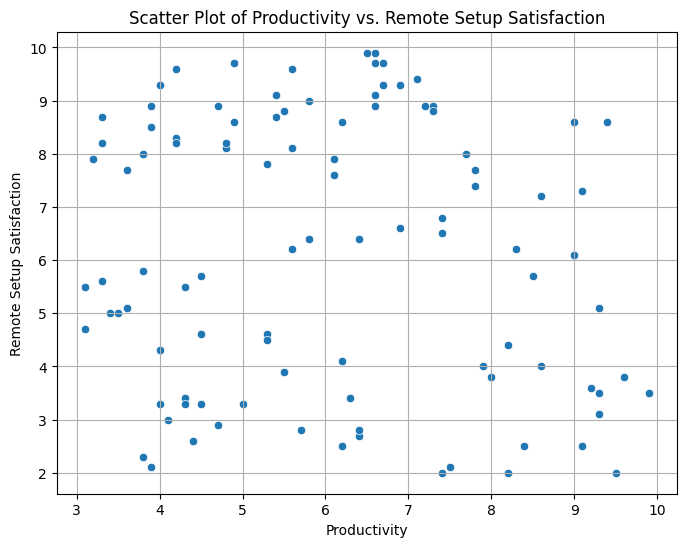

In [23]:
# Perform Pearson correlation test
correlation, p_value = pearsonr(df['Productivity_Score'], df['Remote_Setup_Satisfaction'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Productivity_Score', y='Remote_Setup_Satisfaction', data=df)
plt.title('Scatter Plot of Productivity vs. Remote Setup Satisfaction')
plt.xlabel('Productivity')
plt.ylabel('Remote Setup Satisfaction')
plt.grid(True)
plt.show()

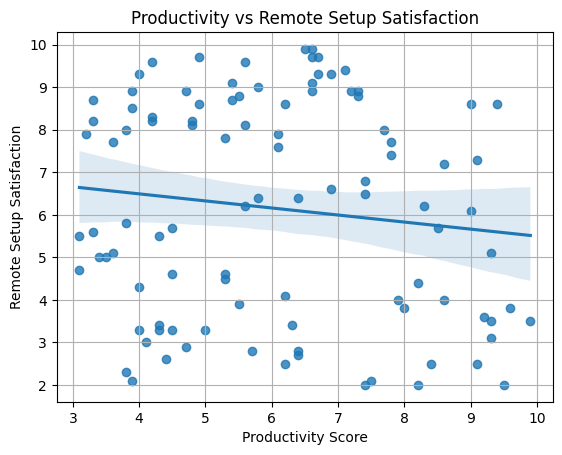

In [ ]:
sns.regplot(x=x, y=y)
plt.title('Productivity vs Remote Setup Satisfaction')
plt.xlabel('Productivity Score')
plt.ylabel('Remote Setup Satisfaction')
plt.grid(True)
plt.show()

In [ ]:
#The trend line slopes downward, indicating a slight negative correlation: higher productivity scores tend to accompany lower satisfaction with the remote setup.
#The confidence interval suggests moderate uncertainty, so the relationship is present but not very strong.

In [ ]:
#pearson ceoff test for Productivity_Score  & Work_Life_Balance_Rating
x1 = df['Productivity_Score']
y1 = df['Work_Life_Balance_Rating']
corr_coef, p_value = pearsonr(x1, y1)
print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Statistically significant correlation.")
else:
    print("Result: No statistically significant correlation.")

Pearson Correlation Coefficient: 0.0731
P-value: 0.4696
Result: No statistically significant correlation.


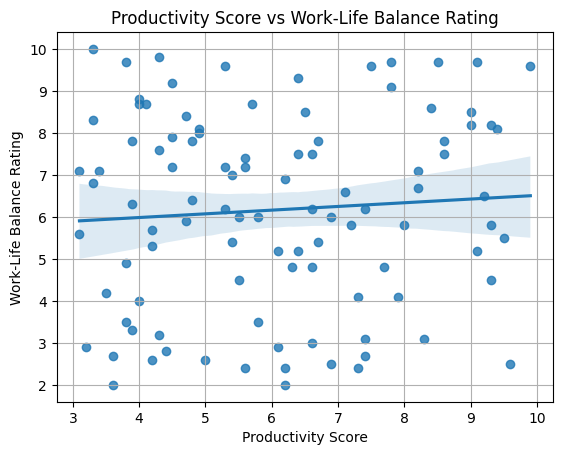

In [ ]:
sns.regplot(x=x1, y=y1)
plt.title("Productivity Score vs Work-Life Balance Rating")
plt.xlabel("Productivity Score")
plt.ylabel("Work-Life Balance Rating")
plt.grid(True)
plt.show()

In [ ]:
#The scatter plot displays individual Productivity Scores (x-axis) against Work-Life Balance Ratings (y-axis). Based on the statistical analysis:
#The Pearson correlation coefficient is 0.0731, indicating a very weak positive relationship
#The p-value is 0.4696, which exceeds the common significance threshold (0.05)
#These results show that the observed relationship is not statistically significant. In other words, there’s no reliable evidence that higher productivity scores are associated with changes in work-life balance ratings in this dataset.

In [ ]:
# ONE WAY ANOVA TEST FOR Numerical variable- Productivity_Score and categorical variables like country and gender
df_anova_country = df[['Productivity_Score', 'Country']].dropna()
model_country = ols('Productivity_Score ~ C(Country)', data=df_anova_country).fit()
anova_table_country = sm.stats.anova_lm(model_country, typ=2)

print("ANOVA Test for Productivity_Score by Country:")
print(anova_table_country)

ANOVA Test for Productivity_Score by Country:
                sum_sq    df         F   PR(>F)
C(Country)   15.996409   6.0  0.713516  0.63958
Residual    347.496691  93.0       NaN      NaN


In [ ]:
#Since the p-value (0.6396) is well above the conventional 0.05 threshold, we fail to reject the null hypothesis. There is no statistically significant difference in mean Productivity Scores across the six countries in your sample.we conclude that any differences in average productivity scores among the six countries are likely due to random variation rather than a true country effect.You cannot claim that nationality influences productivity based on this sample.

In [ ]:
# ANOVA for Productivity_Score and Gender
df_anova_gender = df[['Productivity_Score', 'Gender']].dropna()
model_gender = ols('Productivity_Score ~ C(Gender)', data=df_anova_gender).fit()
anova_table_gender = sm.stats.anova_lm(model_gender, typ=2)
print("\nANOVA Test for Productivity_Score by Gender:")
anova_table_gender


ANOVA Test for Productivity_Score by Gender:


,sum_sq,df,F,PR(>F)
C(Gender),20.647112,3.0,1.927126,0.130334
Residual,342.845988,96.0,NaN,NaN


In [24]:
#The p-value (0.1303) exceeds the 0.05 significance threshold, so we fail to reject the null hypothesis. This indicates there is no statistically significant difference in average Productivity Scores across the gender groups in this dataset.There’s no strong evidence that one gender is more or less productive than another in our sample. Any small gaps in the group averages likely come from individual variation, not from gender itself.

Work_Mode
Remote    41
Hybrid    33
Onsite    26
Name: count, dtype: int64
Exercise_Frequency
Twice-Thrice/Week    28
Never                26
Rarely               24
Daily                22
Name: count, dtype: int64
Number of rows after dropping NaNs: 100
Checking group sizes:
Work_Mode  Exercise_Frequency
Hybrid     Daily                  7
           Never                 13
           Rarely                 8
           Twice-Thrice/Week      5
Onsite     Daily                  6
           Never                  6
           Rarely                 5
           Twice-Thrice/Week      9
Remote     Daily                  9
           Never                  7
           Rarely                11
           Twice-Thrice/Week     14
dtype: int64

Two-Way ANOVA Test for Hours_Worked_Per_Week by Work_Mode and Exercise_Frequency:
                                         sum_sq    df         F    PR(>F)
C(Work_Mode)                          58.572421   2.0  1.381169  0.256678
C(Exercise_Frequ

TypeError: `errorbar` must be a callable, string, or (string, number) tuple

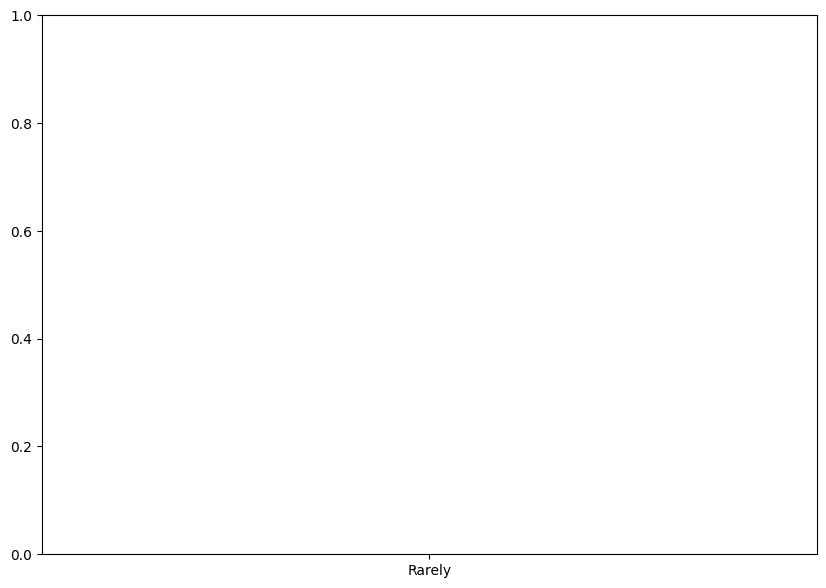

In [43]:
#  To run 2 way ANOVA for for 'Hours_Worked_Per_Week' , 'Work_Mode' , 'Exercise_Frequency'

# Check unique values and counts for the categorical variables
print(df['Work_Mode'].value_counts())
print(df['Exercise_Frequency'].value_counts())

# Drop rows with missing values in the required columns
df_anova_2way = df[['Hours_Worked_Per_Week', 'Work_Mode', 'Exercise_Frequency']].dropna()

# Check the number of rows after dropping NaNs
print(f"Number of rows after dropping NaNs: {len(df_anova_2way)}")

# Check for groups with only one observation (this can cause issues with ANOVA)
print("Checking group sizes:")
print(df_anova_2way.groupby(['Work_Mode', 'Exercise_Frequency']).size())

model_2way = ols('Hours_Worked_Per_Week ~ C(Work_Mode) + C(Exercise_Frequency) + C(Work_Mode):C(Exercise_Frequency)', data=df_anova_2way).fit()

# Perform the ANOVA analysis
anova_table_2way = sm.stats.anova_lm(model_2way, typ=2) # Use typ=2 for potentially unbalanced data

print("\nTwo-Way ANOVA Test for Hours_Worked_Per_Week by Work_Mode and Exercise_Frequency:")
print(anova_table_2way)



# Check the p-values for significance (usually against alpha = 0.05)
alpha = 0.05

print("\nInterpretation:")
if anova_table_2way['PR(>F)']['C(Work_Mode)'] < alpha:
    print("The main effect of Work_Mode on Hours_Worked_Per_Week is statistically significant.")
else:
    print("The main effect of Work_Mode on Hours_Worked_Per_Week is not statistically significant.")

if anova_table_2way['PR(>F)']['C(Exercise_Frequency)'] < alpha:
    print("The main effect of Exercise_Frequency on Hours_Worked_Per_Week is statistically significant.")
else:
    print("The main effect of Exercise_Frequency on Hours_Worked_Per_Week is not statistically significant.")

if anova_table_2way['PR(>F)']['C(Work_Mode):C(Exercise_Frequency)'] < alpha:
    print("The interaction effect between Work_Mode and Exercise_Frequency on Hours_Worked_Per_Week is statistically significant.")
    print("This means the effect of one factor depends on the level of the other.")
else:
    print("The interaction effect between Work_Mode and Exercise_Frequency on Hours_Worked_Per_Week is not statistically significant.")
    print("This suggests the effects of the two factors are independent or additive.")

   # Plotting the interaction effect
plt.figure(figsize=(10, 7))
sns.pointplot(data=df_anova_2way, x='Exercise_Frequency', y='Hours_Worked_Per_Week', hue='Work_Mode', dodge=True, errorbar=('ci', 'se'))
plt.title('Interaction Plot: Hours Worked per Week by Exercise Frequency and Work Mode')
plt.xlabel('Exercise Frequency')
plt.ylabel('Mean Hours Worked per Week')
plt.grid(True)
plt.show()

In [44]:
#There’s no meaningful difference in average hours worked per week between different work modes.
#Exercise frequency does not significantly change how many hours people work.
#How often someone exercises does not alter the relationship between their work mode and hours worked.In our sample, neither whether you work in-office, remotely, or in a hybrid setup, nor how often you exercise, has a significant impact on how many hours you work each week. Even combining those two factors doesn’t show any real effect. Any minor differences in hours are just random variation, not tied to your work mode or exercise habits.

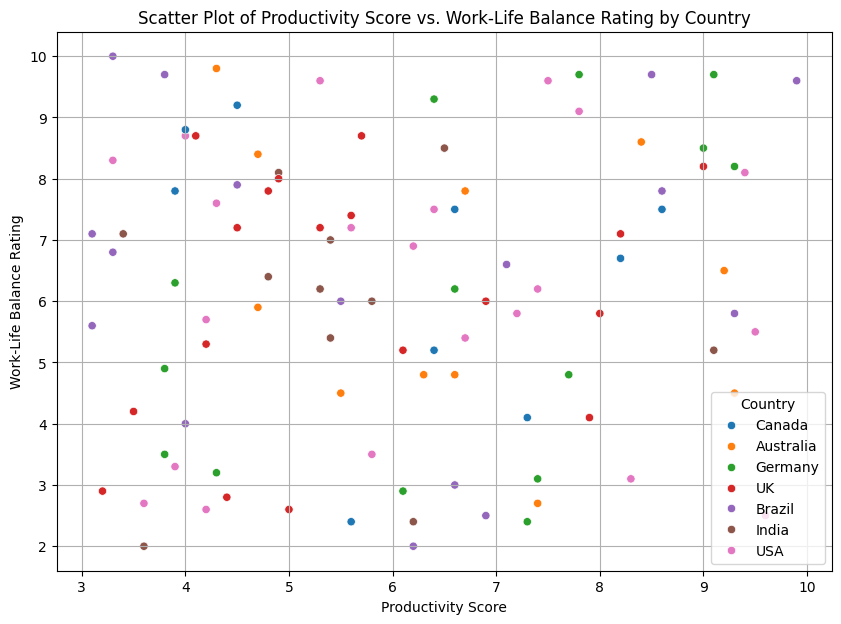

There’s no strong, consistent relationship between productivity and work-life balance across this dataset. Country clusters hint at cultural or systemic differences—Australia and Germany respondents tend to report better balance, whereas Brazil and India show more lower-balance scores. However, individual variation within each country is substantial, so other factors (e.g., role, industry, personal habits) likely drive work-life perceptions more than productivity alone.


In [56]:
#Scatter plot for

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Productivity_Score', y='Work_Life_Balance_Rating', hue='Country', data=df)
plt.title('Scatter Plot of Productivity Score vs. Work-Life Balance Rating by Country')
plt.xlabel('Productivity Score')
plt.ylabel('Work-Life Balance Rating')
plt.grid(True)
plt.show()
print("There’s no strong, consistent relationship between productivity and work-life balance across this dataset. Country clusters hint at cultural or systemic differences—Australia and Germany respondents tend to report better balance, whereas Brazil and India show more lower-balance scores. However, individual variation within each country is substantial, so other factors (e.g., role, industry, personal habits) likely drive work-life perceptions more than productivity alone.")

([<matplotlib.patches.Wedge at 0x784ee8ae7bd0>,
 [Text(-0.9287607743576376, 0.5894093857537405, 'Non-binary'),
  Text(-0.2061190008813162, -1.0805160607208428, 'Male'),
  Text(1.0978294115800824, -0.06906940762544606, 'Prefer not to say'),
  Text(0.46835658823079607, 0.9953100553399472, 'Female')],
 [Text(-0.5065967860132568, 0.32149602859294935, '32.0%'),
  Text(-0.11242854593526337, -0.5893723967568233, '30.0%'),
  Text(0.598816042680045, -0.037674222341152384, '24.0%'),
  Text(0.25546722994407056, 0.5428963938217893, '14.0%')])

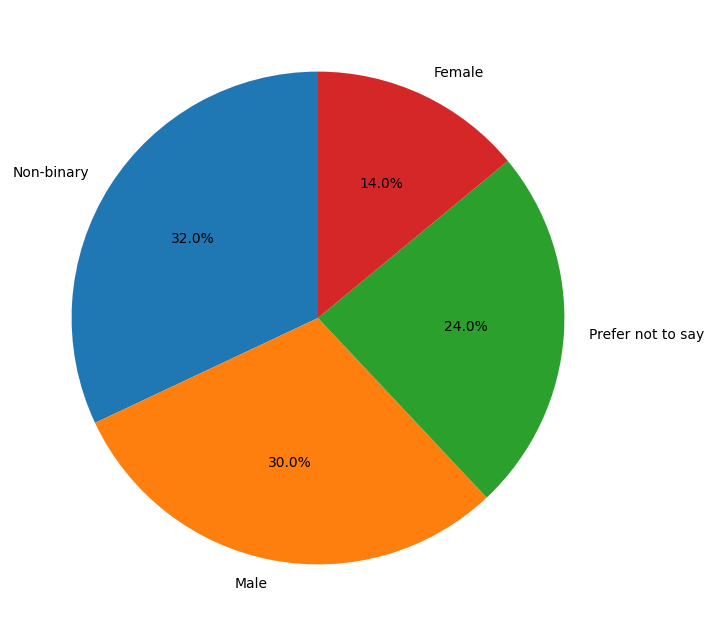

In [58]:
#pie chart for
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

/tmp/ipython-input-60-2705364211.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Burnout_Score', data=mean_burnout_by_country, palette='viridis')


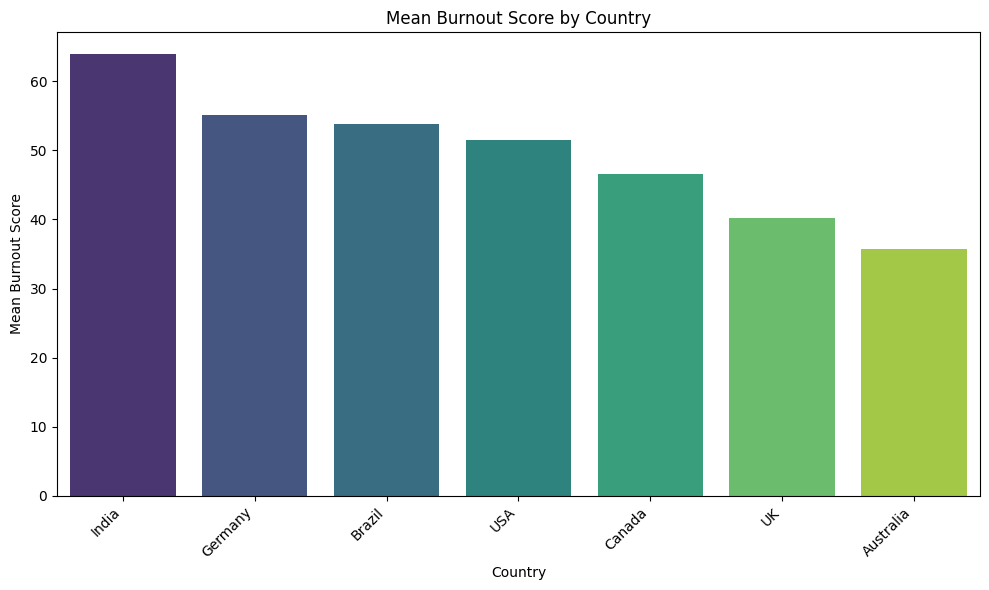

In [60]:
#  comparative bar chart for country and    Mean Burnout_Score

mean_burnout_by_country = df.groupby('Country')['Burnout_Score'].mean().reset_index()
mean_burnout_by_country = mean_burnout_by_country.sort_values('Burnout_Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Burnout_Score', data=mean_burnout_by_country, palette='viridis')
plt.title('Mean Burnout Score by Country')
plt.xlabel('Country')
plt.ylabel('Mean Burnout Score')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()